In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import copy

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

In [2]:
SeoulBikeData = pd.read_csv("SeoulBikeData.csv", encoding="cp949").drop(["Date","Hour","Holiday","Seasons"], axis = 1)
SeoulBikeData.head()

,Rented Bike Count,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [3]:
SeoulBikeData["Functioning Day"] = SeoulBikeData["Functioning Day"].map({"Yes":1, "No":0})
SeoulBikeData.head()

,Rented Bike Count,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


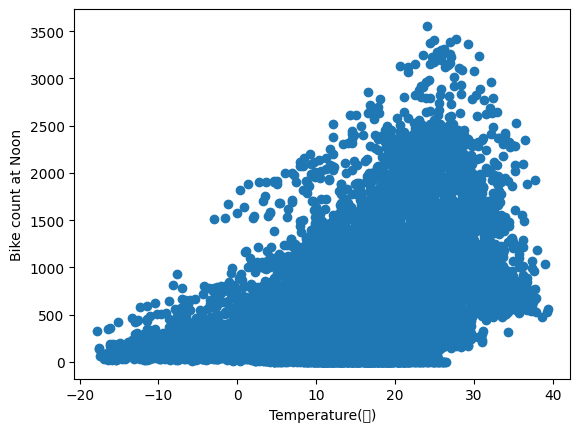

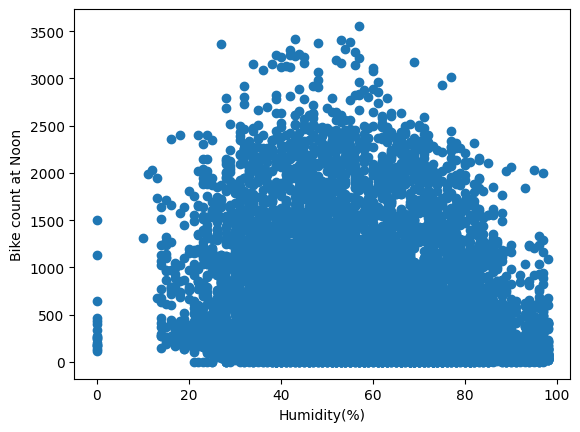

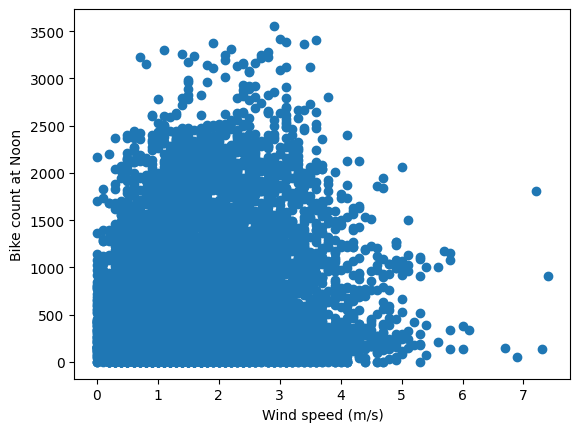

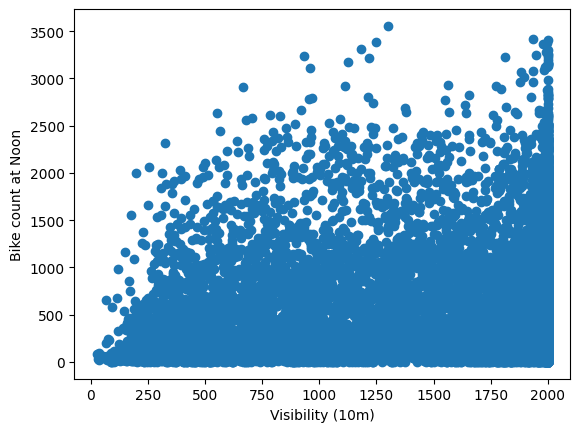

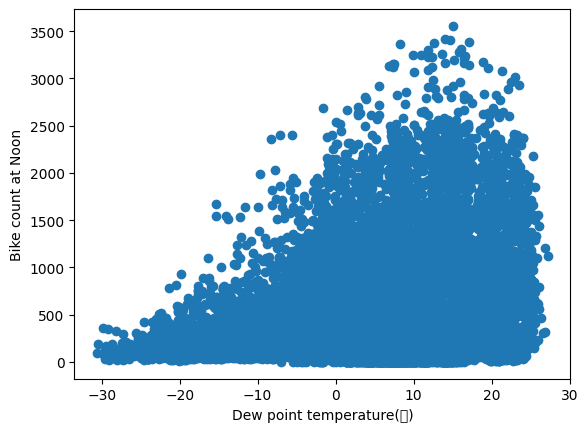

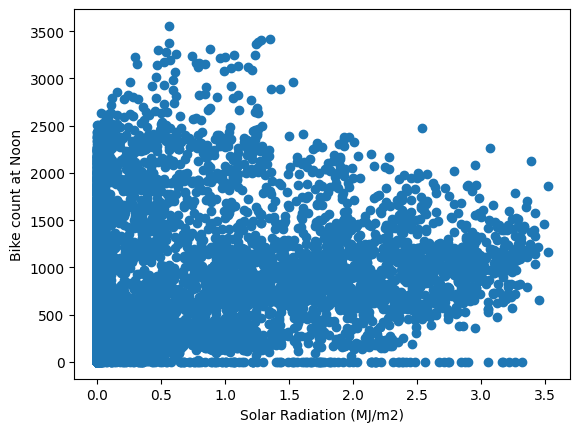

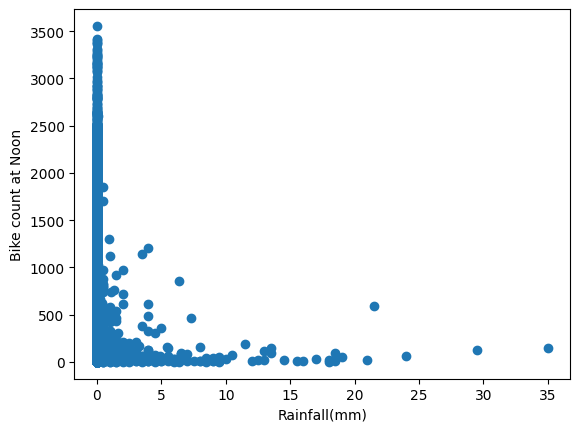

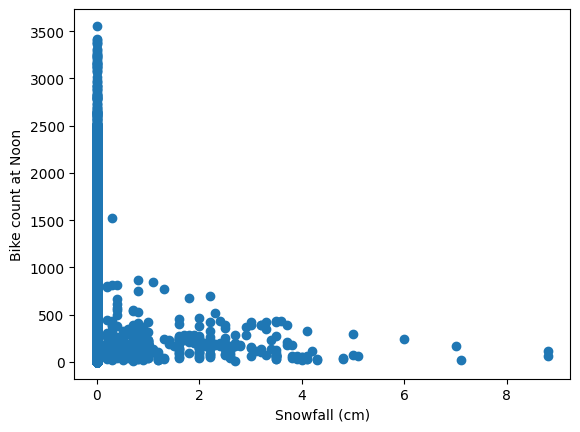

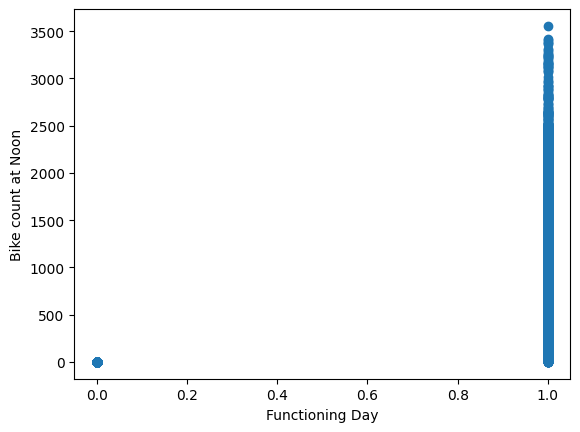

In [4]:
for label in SeoulBikeData.columns[1:]:
  plt.scatter(SeoulBikeData[label], SeoulBikeData["Rented Bike Count"])
  plt.xlabel(label)
  plt.ylabel("Bike count at Noon")
  plt.show()

In [5]:
SeoulBikeData = SeoulBikeData.drop(["Wind speed (m/s)",	"Visibility (10m)", "Functioning Day"], axis = 1)
SeoulBikeData.head()

,Rented Bike Count,Temperature(캜),Humidity(%),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,-17.6,0.0,0.0,0.0
1,204,-5.5,38,-17.6,0.0,0.0,0.0
2,173,-6.0,39,-17.7,0.0,0.0,0.0
3,107,-6.2,40,-17.6,0.0,0.0,0.0
4,78,-6.0,36,-18.6,0.0,0.0,0.0


# **Train, Validation and  Test Split**

In [6]:
train, val, test = np.split(SeoulBikeData.sample(frac=1), [int(.6*len(SeoulBikeData)), int(.8*len(SeoulBikeData))])
def get_xy(dataframe, y_label, x_labels):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None or len(x_labels) == 0:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[[x_labels[0]]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))
  return data, X, y

In [7]:
_, X_train_Temperature,  y_train_Temperature = get_xy(train, "Rented Bike Count", x_labels = ["Temperature(캜)"])
_ , X_val_Temperature,  y_val_Temperature = get_xy(val, "Rented Bike Count", x_labels = ["Temperature(캜)"])
_ , X_test_Temperature,  y_test_Temperature = get_xy(test, "Rented Bike Count", x_labels = ["Temperature(캜)"])

# **Linear Regression**

In [8]:
from sklearn.linear_model import LinearRegression

Temperature_Reg = LinearRegression()
Temperature_Reg.fit(X_train_Temperature, y_train_Temperature)

LinearRegression()

In [9]:
print("Coefiecient",Temperature_Reg.coef_)
print("Intercept",Temperature_Reg.intercept_)
print("Score",Temperature_Reg.score(X_test_Temperature, y_test_Temperature))

Coefiecient [[28.86586042]]
Intercept [328.63715578]
Score 0.27285345282531337


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


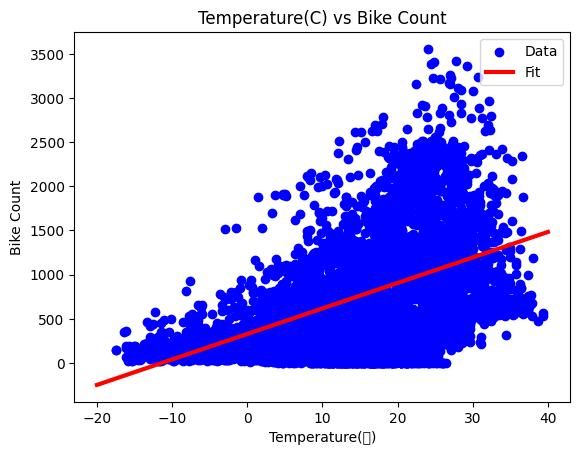

In [10]:
plt.scatter(X_train_Temperature, y_train_Temperature, label ="Data", color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, Temperature_Reg.predict(np.array(x).reshape(-1, 1)), label = "Fit", color = "red", linewidth = 3)
plt.title("Temperature(C) vs Bike Count")
plt.xlabel("Temperature(캜)")
plt.ylabel("Bike Count")
plt.legend()
plt.show()

# **Multiple Linear Regression**

In [11]:
def plot_history(history):
  # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  plt.plot(history.history['loss'] ,label="loss")
  plt.plot(history.history['val_loss'] ,label="val_loss")
  plt.title('Model Loss')
  plt.ylabel('MSE')
  plt.xlabel('Epoch')
  plt.legend(['loss', 'val_loss'], loc='upper left')
  plt.grid(True)

In [12]:
train, val, test = np.split(SeoulBikeData.sample(frac=1), [int(.6*len(SeoulBikeData)), int(.8*len(SeoulBikeData))])
_, X_train_All,  y_train_All= get_xy(train, "Rented Bike Count", x_labels = SeoulBikeData.columns[1:])
_ , X_val_All,  y_val_All = get_xy(val, "Rented Bike Count", x_labels = SeoulBikeData.columns[1:])
_ , X_test_All,  y_test_All = get_xy(test, "Rented Bike Count", x_labels =SeoulBikeData.columns[1:])

In [13]:
all_Reg = LinearRegression()
all_Reg.fit(X_train_All, y_train_All)

LinearRegression()

In [14]:
print("Coefiecient",all_Reg.coef_)
print("Intercept",all_Reg.intercept_)
print("Score",all_Reg.score(X_test_All, y_test_All))

Coefiecient [[ 32.45400916 -12.30185293   3.40957478 -97.22926318 -49.03191146
   47.65645033]]
Intercept [1053.36289668]
Score 0.3941750601420414


# **Regression With Neural Network**

In [15]:
Temperature_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
Temperature_normalizer.adapt(X_train_Temperature.reshape(-1,1))

In [16]:
Temperature_nn_model = tf.keras.Sequential([
  Temperature_normalizer,
  # tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])
Temperature_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mean_squared_error")

In [17]:
history = Temperature_nn_model.fit(X_train_Temperature, y_train_Temperature, epochs=100, validation_data=(X_val_Temperature, y_val_Temperature))

Epoch 1/100
165/165 [==============================] - 4s 15ms/step - loss: 904611.0625 - val_loss: 895252.6875
Epoch 2/100
165/165 [==============================] - 2s 13ms/step - loss: 901292.4375 - val_loss: 891974.0000
Epoch 3/100
165/165 [==============================] - 1s 6ms/step - loss: 897980.1875 - val_loss: 888683.5000
Epoch 4/100
165/165 [==============================] - 2s 13ms/step - loss: 894676.9375 - val_loss: 885400.7500
Epoch 5/100
165/165 [==============================] - 1s 5ms/step - loss: 891388.1875 - val_loss: 882148.8125
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 888103.4375 - val_loss: 878907.9375
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 884851.0625 - val_loss: 875679.2500
Epoch 8/100
165/165 [==============================] - 0s 3ms/step - loss: 881605.6250 - val_loss: 872465.1875
Epoch 9/100
165/165 [==============================] - 0s 2ms/step - loss: 878365.8125 - val_loss: 869249.625

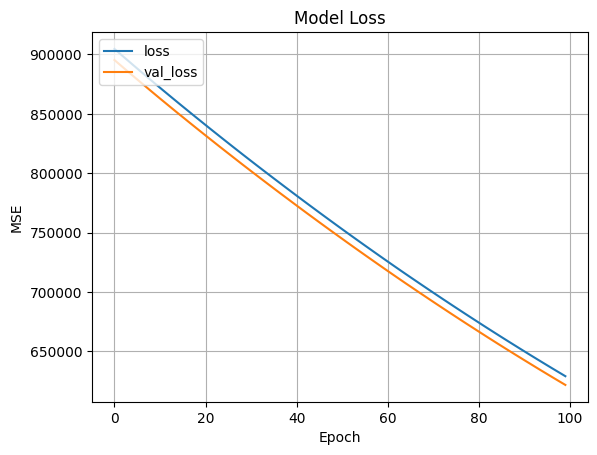

In [18]:
plot_history(history)

4/4 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


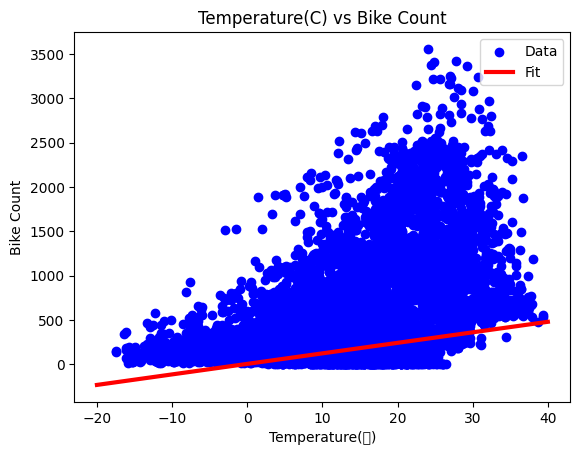

In [19]:
plt.scatter(X_train_Temperature, y_train_Temperature, label ="Data", color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, Temperature_nn_model.predict(np.array(x).reshape(-1, 1)), label = "Fit", color = "red", linewidth = 3)
plt.title("Temperature(C) vs Bike Count")
plt.xlabel("Temperature(캜)")
plt.ylabel("Bike Count")
plt.legend()
plt.show()

#**Only Neural Network**

In [20]:
Temperature_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
Temperature_normalizer.adapt(X_train_Temperature.reshape(-1,1))

nn_model = tf.keras.Sequential([
  Temperature_normalizer,
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(1, activation="relu")
])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 32)                64        
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1156 (4.52 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [21]:
history1 = nn_model.fit(X_train_Temperature, y_train_Temperature, epochs=100, validation_data=(X_val_Temperature, y_val_Temperature))

Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 905116.5625 - val_loss: 897432.6875
Epoch 2/100
165/165 [==============================] - 0s 3ms/step - loss: 905116.6250 - val_loss: 897432.6875
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 905116.5625 - val_loss: 897432.6875
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 905116.6250 - val_loss: 897432.6875
Epoch 5/100
165/165 [==============================] - 0s 3ms/step - loss: 905116.9375 - val_loss: 897432.6875
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 905117.0000 - val_loss: 897432.6875
Epoch 7/100
165/165 [==============================] - 0s 3ms/step - loss: 905116.7500 - val_loss: 897432.6875
Epoch 8/100
165/165 [==============================] - 0s 2ms/step - loss: 905116.8125 - val_loss: 897432.6875
Epoch 9/100
165/165 [==============================] - 0s 2ms/step - loss: 905116.4375 - val_loss: 897432.6875
E

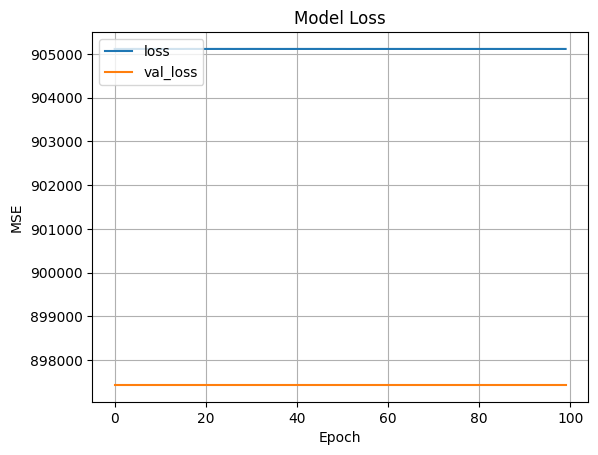

In [22]:
plot_history(history1)

4/4 [==============================] - 0s 3ms/step


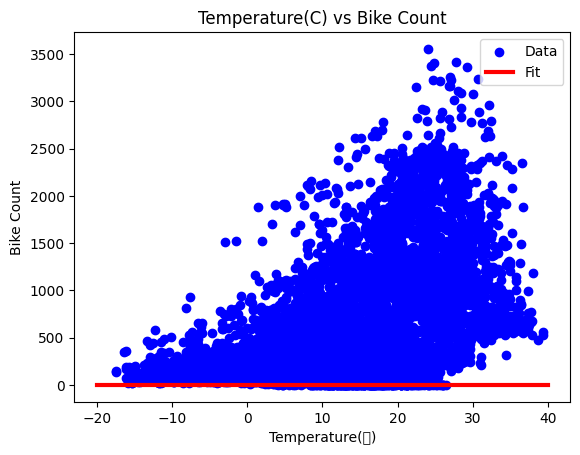

In [23]:
plt.scatter(X_train_Temperature, y_train_Temperature, label ="Data", color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label = "Fit", color = "red", linewidth = 3)
plt.title("Temperature(C) vs Bike Count")
plt.xlabel("Temperature(캜)")
plt.ylabel("Bike Count")
plt.legend()
plt.show()

In [24]:
All_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
All_normalizer.adapt(X_train_All)

nn_model1 = tf.keras.Sequential([
  All_normalizer,
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(1, activation="relu")
])
nn_model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")
nn_model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 6)                 13        
 tion)                                                           
                                                                 
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2382 (9.31 KB)
Trainable params: 2369 (9.25 KB)
Non-trainable params: 13 (56.00 Byte)
____________________

In [25]:
history2 = nn_model1.fit(X_train_All, y_train_All, epochs=100, validation_data=(X_val_All, y_val_All))

Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 855231.1250 - val_loss: 572741.1250
Epoch 2/100
165/165 [==============================] - 1s 4ms/step - loss: 348056.4375 - val_loss: 271090.2500
Epoch 3/100
165/165 [==============================] - 1s 4ms/step - loss: 262774.5312 - val_loss: 256843.4531
Epoch 4/100
165/165 [==============================] - 1s 4ms/step - loss: 252222.1719 - val_loss: 255201.9375
Epoch 5/100
165/165 [==============================] - 1s 4ms/step - loss: 249400.9688 - val_loss: 250357.4688
Epoch 6/100
165/165 [==============================] - 1s 5ms/step - loss: 246985.5156 - val_loss: 249087.1406
Epoch 7/100
165/165 [==============================] - 0s 3ms/step - loss: 245301.9688 - val_loss: 248380.5781
Epoch 8/100
165/165 [==============================] - 0s 3ms/step - loss: 244077.2969 - val_loss: 246714.2656
Epoch 9/100
165/165 [==============================] - 0s 3ms/step - loss: 242380.9531 - val_loss: 244830.5625
E

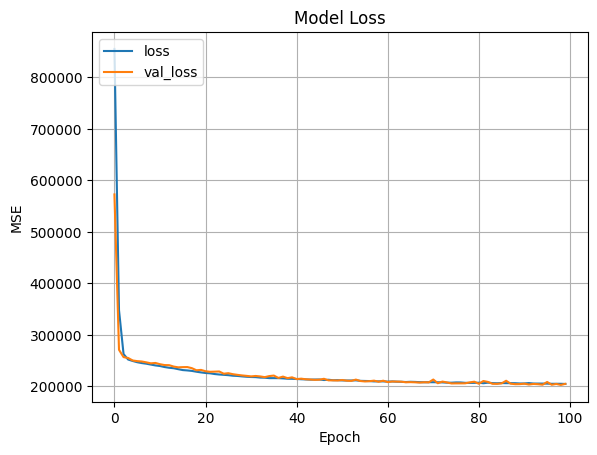

In [26]:
plot_history(history2)

In [27]:
y_pred_lr = all_Reg.predict(X_test_All)
y_pred_nn = nn_model1.predict(X_test_All)

55/55 [==============================] - 0s 1ms/step


In [28]:
def MSE(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

In [29]:
MSE(y_test_All, y_pred_lr)

247042.68600276636

In [30]:
MSE(y_test_All, y_pred_nn)

206795.72918520207

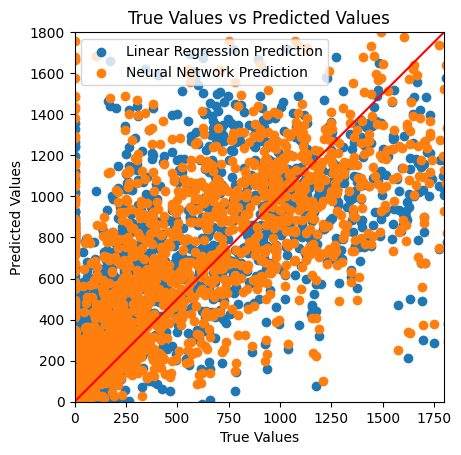

In [32]:
ax  = plt.axes(aspect='equal')
plt.scatter(y_test_All, y_pred_lr, label = "Linear Regression Prediction")
plt.scatter(y_test_All, y_pred_nn, label = "Neural Network Prediction")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, c="red")
plt.title("True Values vs Predicted Values")
plt.legend()
plt.show()